# Proyek Analisis Data: E-Commerce
- **Nama:** Raissa Calista Salsabila
- **Email:** salsabilaahsn@gmail.com
- **ID Dicoding:** calistaas

## Defining Business Questions

- Which state have the highest concentration of customers placing orders?
- What is the product category with the highest number of orders? 
- What was the month with the highest number of orders in 2017? Can we get the any insight from that data to use for this year (2018)?
- How is our customer segmentation? (RFM Analysis)

## Import All Packages/Libraries Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data
Gathering all data to answer the business questions.

1. Read the customer data and save it in customers_df variable.

In [2]:
customers_df = pd.read_csv("dataset\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


2. Read the geolocation data and save it in geos_df variable.

In [3]:
geos_df = pd.read_csv("dataset\geolocation_dataset.csv")
geos_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


3. Read the order items data and save it in order_items_df variable.

In [4]:
order_items_df = pd.read_csv("dataset\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


4. Read the order reviews data and save it in order_reviews_df variable.

In [5]:
order_reviews_df = pd.read_csv("dataset\order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,3/1/2018 0:00,3/2/2018 10:26


5. Read the order data and save it in order_data_df variable.

In [6]:
order_data_df = pd.read_csv("dataset\orders_dataset.csv")
order_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


6. Read the products data and save it in products_data_df variable.

In [7]:
products_data_df = pd.read_csv("dataset\products_dataset.csv")
products_data_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


7. Read the product category name in English data and save it in products_eng variable.

In [8]:
products_eng_df = pd.read_csv("dataset\product_category_name_translation.csv")
products_eng_df.head()   

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


8. Read the seller data and save it in seller_data_df variable.

In [9]:
seller_data_df = pd.read_csv("dataset\sellers_dataset.csv")
seller_data_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data
To identify the data's proble i.e missing value, invalid value, duplication, etc

#### Assessing Customer Data

In [10]:
#using the info function to know the structure of the data frame
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
#check the missing value for each column
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [12]:
#check the duplicates
print("Total of duplicates: ",customers_df.duplicated().sum())

Total of duplicates:  0


In [13]:
#check the summary statistics for the numerical column
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Assessing Geolocation Data

In [14]:
#using the info function to know the structure of the data frame
geos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
#check the missing value for each column
geos_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [16]:
#check the duplicates
print("Total of duplicates: ",geos_df.duplicated().sum())

Total of duplicates:  261836


In [17]:
#check the summary statistics for the numerical column
geos_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Assessing Order Items Data

In [18]:
#using the info function to know the structure of the data frame
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


As the ouput from the code above, the date still use object as the datatype, I will change it later during the cleaning process

In [19]:
#check the missing value for each column
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
#check the duplicates
print("Total of duplicates: ",order_items_df.duplicated().sum())

Total of duplicates:  0


#### Assessing Order Reviews Data

In [21]:
#using the info function to know the structure of the data frame
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [22]:
#check the missing value for each column
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Too many empty values for the comment title and its message, as I can say only giving the score is mandatory

In [23]:
#check the duplicates
print("Total of duplicates: ",order_reviews_df.duplicated().sum())

Total of duplicates:  0


In [24]:
#check the summary statistics for the numerical column
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Assessing Products Data

In [25]:
#using the info function to know the structure of the data frame
products_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


the product quantity still use float as its datatype, meanwhile to measure a quantity we should use an integer datatype

In [26]:
#check the missing value for each column
products_data_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [27]:
#check the duplicates
print("Total of duplicates: ",products_data_df.duplicated().sum())

Total of duplicates:  0


In [28]:
#check the summary statistics for the numerical column
products_data_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Assessing Product Category (Eng Trans) 

In [29]:
products_eng_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [30]:
#check the missing value for each column
products_eng_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

#### Assessing Order Data

In [31]:
#using the info function to know the structure of the data frame
order_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


All the date variable still using the object datatype.Of course we should change it to gather more information.

In [32]:
#check the duplicates
print("Total of duplicates: ",products_eng_df.duplicated().sum())

Total of duplicates:  0


In [33]:
#check the missing value for each column
order_data_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing values on 3 diff variables

In [34]:
#check the duplicates
print("Total of duplicates: ",order_data_df.duplicated().sum())

Total of duplicates:  0


#### Assessing Seller Data

In [35]:
#using the info function to know the structure of the data frame
seller_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
seller_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [37]:
#check the duplicates
print("Total of duplicates: ",seller_data_df.duplicated().sum())

Total of duplicates:  0


In [38]:
#check the summary statistics for the numerical column
seller_data_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Cleaning Customer Data
For clening this data, I prefer to drop the zip columns, since the same state could have a different zip code

In [39]:
#removing the zip code and city columns
#axis 1 refers to column
#inplace means that the changed will go directly to the orginal table
customers_df.drop(["customer_zip_code_prefix"],axis=1,inplace=True)

In [40]:
customers_df.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


Try to make the values of the city looks neat. So, I want to make it with capital each word format

In [41]:
customers_df["customer_city"] = customers_df["customer_city"].str.title()

In [42]:
customers_df.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,Campinas,SP


#### Cleaning Geolocation Data
For this data, I prefer to only keep the city name and its code, it could make me easire to proceed the data with other table. Another reason is because one city could have many zipcode.

In [43]:
geos_df.drop(["geolocation_zip_code_prefix","geolocation_lat","geolocation_lng"],axis=1,inplace=True)

In [44]:
#take the disctinct data of the city to reduce duplication
#assigning the aggregation result in aggregate data variable
aggregate_data = geos_df.groupby(by="geolocation_state").agg({
    "geolocation_city":"first"
},inplace=True)

#assigning it back
geos_df = aggregate_data

In [45]:
#make each first letter start with uppercase 
geos_df['geolocation_city']= geos_df['geolocation_city'].apply(lambda x: x.title())

#renaming the coloumn state to code
geos_df.rename({"geolocation_state": "geolocation_code"},axis = 1, inplace = True)

In [46]:
#check the duplicates
print("Total of duplicates: ",geos_df.duplicated().sum())

Total of duplicates:  1


Since there is one more duplication, I choose to drop it

In [47]:
#drop the rows and only keep the last duplicate
geos_df.drop_duplicates(keep='last',inplace=True)

In [48]:
#recheck the duplicates
print("Total of duplicates: ",geos_df.duplicated().sum())

Total of duplicates:  0


#### Cleaning Order Items Table
For this data, I will handle the dataype and renaming a column

In [49]:
#handling a datatype
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [50]:
order_items_df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.9,13.29


In [51]:
#for float datatype only accept one number after comma
order_items_df["price"]= order_items_df["price"].apply(lambda x: round(x, 1))
order_items_df["freight_value"]= order_items_df["freight_value"].apply(lambda x: round(x, 1))

As I can see in the order_item_id, it still has an ambigus meaning. If that;s suppose to be an id as in primary key, there is no distinct. So , I will change the name of it to quantity.

In [52]:
order_items_df.rename({'order_item_id' : "product_quantity"},axis=1, inplace=True)

#### Cleaning Order Reviews Table
As for the review title and message have a lot of missing value, I choose to drop it, only using the score already could help me. 

In [53]:
order_reviews_df.drop(["review_comment_title","review_comment_message","review_answer_timestamp"],axis=1,inplace=True)

In [54]:
order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00


The missing values come from a datetime series so I use interpolation to find a value that I will use in my imputation method.

In [55]:
#handling the datatype
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])

#handling the missing value using the linear interpolation
order_reviews_df['review_creation_date']= order_reviews_df['review_creation_date'].interpolate(method='linear')

In [56]:
#rearrange the column position
order_reviews_df = order_reviews_df[['review_id', 'order_id', 'review_creation_date', 'review_score']]

In [57]:
order_reviews_df.head()

,review_id,order_id,review_creation_date,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,2018-01-18,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,2018-03-10,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,2018-02-17,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,2017-04-21,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,2018-03-01,5


#### Cleaning Order Data
The issues of this data are the datatype for its datetime variable, so I will change it.

In [58]:
#handling the datatype
order_data_df['order_approved_at']             = pd.to_datetime(order_data_df['order_approved_at'])
order_data_df['order_purchase_timestamp']      = pd.to_datetime(order_data_df['order_purchase_timestamp'])
order_data_df['order_delivered_carrier_date']  = pd.to_datetime(order_data_df['order_delivered_carrier_date'])
order_data_df['order_delivered_customer_date'] = pd.to_datetime(order_data_df['order_delivered_customer_date'])
order_data_df['order_estimated_delivery_date'] = pd.to_datetime(order_data_df['order_estimated_delivery_date'])

For this data, I will only picked the status order of delivered

In [59]:
#handling the missing value
order_data_df = order_data_df[order_data_df['order_status'] == 'delivered']

order_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26


In [60]:
#handling the missing value using the linear interpolation
order_data_df['order_approved_at']              = order_data_df['order_approved_at'].interpolate(method='linear')
order_data_df['order_delivered_carrier_date']   = order_data_df['order_delivered_carrier_date'].interpolate(method='linear')
order_data_df['order_delivered_customer_date']  = order_data_df['order_delivered_customer_date'].interpolate(method='linear')

In [61]:
order_data_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Cleaning Seller Data
Not many cleaning process I will do in this data, more then to make it looks neat, like applying capital each word in its city name

In [62]:
#make each first letter start with uppercase 
seller_data_df['seller_city']= seller_data_df['seller_city'].apply(lambda x: x.title())

In [63]:
#renaming the coloumn state to code
seller_data_df.rename({"seller_state": "seller_city_code"},axis = 1, inplace = True)

In [64]:
seller_data_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_city_code
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


#### Cleaning Product Data
For the the product category, I use the imputation method to fill in the missing values. Simply by using the most fruquent value that appears in in product category.

In [65]:
#counting the most frequent name that appears
products_data_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [66]:
#fill in the missing category name with the most frequent data
products_data_df['product_category_name'].fillna(value="cama_mesa_banho ", inplace=True)

For the numerical column, I choose to fill in the data with the median value. Before that, I want to round up all the value so that will only 1 number after comma.

In [67]:
products_data_df['product_name_lenght'] = products_data_df['product_name_lenght'].apply(lambda x: round(x, 1))
products_data_df['product_description_lenght'] = products_data_df['product_description_lenght'].apply(lambda x: round(x, 1))
products_data_df['product_weight_g'] = products_data_df['product_weight_g'].apply(lambda x: round(x, 1))
products_data_df['product_length_cm'] = products_data_df['product_length_cm'].apply(lambda x: round(x, 1))
products_data_df['product_width_cm'] = products_data_df['product_width_cm'].apply(lambda x: round(x, 1))
products_data_df['product_height_cm'] = products_data_df['product_height_cm'].apply(lambda x: round(x, 1))

Finding the median of each value using this code:
median_value = customers_df['column_name'].median()

In [68]:
nl_median = products_data_df['product_name_lenght'].median()
dl_median = products_data_df['product_description_lenght'].median()
pq_median = products_data_df['product_photos_qty'].median()
pw_median = products_data_df['product_weight_g'].median()
pl_median = products_data_df['product_length_cm'].median()
pw_median = products_data_df['product_width_cm'].median()
ph_median = products_data_df['product_height_cm'].median()

Fill in the missing value for each column using the median result

In [69]:
products_data_df['product_name_lenght'].fillna(nl_median, inplace=True)
products_data_df['product_description_lenght'].fillna(dl_median, inplace=True)
products_data_df['product_photos_qty'].fillna(pq_median, inplace=True)
products_data_df['product_weight_g'].fillna(pw_median, inplace=True)
products_data_df['product_length_cm'].fillna(pl_median, inplace=True)
products_data_df['product_width_cm'].fillna(pw_median, inplace=True)
products_data_df['product_height_cm'].fillna(ph_median, inplace=True)

For the photos quantity, I change the datatype from float to integer

In [70]:
products_data_df['product_photos_qty'] = products_data_df['product_photos_qty'].astype(int)

Merge the english products_eng_df with the products_data

In [71]:
products_df = pd.merge(products_data_df, products_eng_df,on="product_category_name",how="left")

In [72]:
#replacing the underscore with space
products_df['product_category_name'] = products_df['product_category_name'].str.replace("_"," ")
products_df['product_category_name_english'] = products_df['product_category_name_english'].str.replace("_"," ")

#capitalize each word using title
products_df['product_category_name'] = products_df['product_category_name'].str.title()
products_df['product_category_name_english'] = products_df['product_category_name_english'].str.title()

In [73]:
products_df.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.0,287.0,1,225.0,16.0,10.0,14.0,Perfumery


In [74]:
#rearrage the colum position
products_df = products_df[['product_id','product_category_name','product_category_name_english','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]

In [75]:
products_df.head(1)

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,Perfumery,40.0,287.0,1,225.0,16.0,10.0,14.0


## Exploratory Data Analysis (EDA)

### Explore Order Review
I want to categorize each of review given by the customer simply by this:
- 5 being very good
- 4 being good
- 3 being average
- 2 being poor
- 1 being very poor

In [76]:
#using the loc to give the reference of df and column I want to modify
# the : indicates to select all the rows
order_reviews_df.loc[:,"status"] = order_reviews_df["review_score"].apply(lambda x: "Very Good" if x == 5 else "Good" if x==4 else "Average" if x==3 else "Poor" if x==2 else "Very Poor")
order_reviews_df.sample(5)

,review_id,order_id,review_creation_date,review_score,status
4100,65613a7e99fb0b7dfa2f37a1aebe8680,f3946e7bb785f6ad1f6747355f2f0707,2017-09-22,5,Very Good
41317,860f30b8604aae49d7df4145f09bd2b1,a8b78b69f09b2a198f5a89c1897f8c72,2018-03-15,1,Very Poor
72062,a74135d999d3d77a7a3c54779332e250,f5f23aa3df06d76ce187b4209ea338ea,2017-08-25,4,Good
66474,7eabe68593d19a5451d581ab8a68c91f,460e04c3cfd044ed625de3225dd24d4b,2018-04-27,2,Poor
2216,a91b7b7a996f7d33d0695782817f035e,a9850ce15ae344ed38a260105a67e118,2018-05-01,4,Good


Using pivot table to display the total of review based on status

In [77]:
order_reviews_df.groupby(by="status").review_id.count().sort_values(ascending=False)

status
Very Good    57328
Good         19142
Very Poor    11424
Average       8179
Poor          3151
Name: review_id, dtype: int64

The majority of customer give a **very good** review

#### Explore Customer Data and Geolocation Data
From this exploration I would like to know where most of the customer lives

In [78]:
#merge customers data and city
#merge customers data and the city
customers_city_df = pd.merge(
    left = customers_df,
    right = geos_df,
    how = "left",
    left_on = "customer_state",
    right_on = "geolocation_state"
)

In [79]:
customers_city_df = customers_city_df[['customer_id','customer_unique_id','customer_state','geolocation_city']]
customers_city_df = customers_city_df.rename(columns={'geolocation_city': 'customer_city'})
customers_city_df.head()

,customer_id,customer_unique_id,customer_state,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,Sao Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,Sao Paulo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,Sao Paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,Sao Paulo
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,Sao Paulo


In [80]:
customers_city_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
Sao Paulo                41746
Rio De Janeiro           12852
Belo Horizonte           11635
Nova Andradina            5466
Curitiba                  5045
Balneario De Picarras     3637
Salvador                  3380
Brasilia                  2140
Vitória                   2033
Novo Gama                 2020
Recife                    1652
Fortaleza                 1336
Belem                      975
Cuiabá                     907
Sao Luis                   747
Campo Grande               715
Joao Pessoa                536
Teresina                   495
São Paulo                  485
Maceio                     413
Aracaju                    350
Palmas                     280
Porto Velho                253
Manaus                     148
Macapa                      68
Boa Vista                   46
Name: customer_id, dtype: int64

Sao Paulo holding the position as where the majority of customer comes from

#### Explore Order Item Data

In [81]:
order_items_df.loc[:,"total_price"] = order_items_df["product_quantity"]*order_items_df["price"]
order_items_df.head(1)

,order_id,product_quantity,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.9,13.3,58.9


Finding the most pricey order

In [82]:
order_items_df.groupby(by="order_id").total_price.sum().sort_values(ascending=False)

order_id
03caa2c082116e1d31e67e9ae3700499    60480.0
1b15974a0141d54e36626dca3fdc731a    21000.0
2cc9089445046817a7539d90805e6e5a    20771.1
ab14fdcfbe524636d65ee38360e22ce8    20727.0
736e1922ae60d0d6a89247b851902527    17900.0
                                     ...   
38bcb524e1c38c2c1b60600a80fc8999        2.9
e8bbc1d69fee39eee4c72cb5c969e39d        2.3
f1d5c2e6867fa93ceee9ef9b34a53cbf        2.2
3ee6513ae7ea23bdfab5b9ab60bffcb5        0.8
6e864b3f0ec71031117ad4cf46b7f2a1        0.8
Name: total_price, Length: 98666, dtype: float64

#### Explore The Order and Product Data

In [83]:
product_ordered = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

product_ordered.head()

,order_id,product_quantity,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.9,13.3,58.9,Cool Stuff,Cool Stuff,58.0,598.0,4,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.9,19.9,239.9,Pet Shop,Pet Shop,56.0,239.0,2,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.0,17.9,199.0,Moveis Decoracao,Furniture Decor,59.0,695.0,2,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,13.0,12.8,13.0,Perfumaria,Perfumery,42.0,480.0,1,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.9,18.1,199.9,Ferramentas Jardim,Garden Tools,59.0,409.0,1,3750.0,35.0,40.0,30.0


Find the maximum and minimum price for each product category

In [84]:
product_ordered.groupby(by="product_category_name_english").agg({
    "product_quantity":["max","min","mean"],
    "total_price":["max","min","mean"],
    "freight_value":["max","min","mean"]
    
})

product_quantity               total_price  \
                                           max min      mean         max   
product_category_name_english                                              
Agro Industry And Commerce                   6   1  1.250000      5934.6   
Air Conditioning                             7   1  1.218855      1599.0   
Art                                          6   1  1.100478      6499.0   
Arts And Craftmanship                        2   1  1.083333       289.5   
Audio                                        3   1  1.052198       599.0   
...                                        ...  ..       ...         ...   
Stationery                                   6   1  1.114422      1693.0   
Tablets Printing Image                       2   1  1.072289       890.0   
Telephony                                   14   1  1.135534      2428.0   
Toys                                         6   1  1.079670      1700.0   
Watches Gifts                               12   1  1.100651      4400.0   

                                                freight_value                  
                                min        mean           max  min       mean  
product_category_name_english                                                  
Agro Industry And Commerce     13.0  432.240566         194.6  7.4  27.559906  
Air Conditioning               10.9  228.691919         115.4  6.6  22.719529  
Art                             3.5  121.373206         227.7  7.4  19.353589  
Arts And Craftmanship           9.8   78.166667          68.7  7.4  15.425000  
Audio                          14.9  142.769231          52.7  4.2  15.688736  
...                             ...         ...           ...  ...        ...  
Stationery                      2.3   97.565077         222.4  0.0  18.589789  
Tablets Printing Image         14.9   97.377108          34.5  1.7  14.772289  
Telephony                       5.0   79.246425         121.2  0.0  15.665611  
Toys                            4.9  123.385038         193.8  0.0  18.804809  
Watches Gifts                   9.0  210.255133         209.6  0.0  16.780838  

[71 rows x 9 columns]

We could know the maximum, minimum, and average value of the product quantity, total price, and fright value for each of the product's category

#### Explore The Order Data

In [85]:
order_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26


Get to know the order status of each order

In [86]:
order_data_df.groupby(by="order_status").order_id.count().sort_values(ascending=False)

order_status
delivered    96478
Name: order_id, dtype: int64

In [87]:
#dt.days is used to extract the numebr of days
order_data_df["delivery_duration"] = (order_data_df["order_delivered_customer_date"]-order_data_df["order_purchase_timestamp"]).dt.days

In [88]:
order_data_df.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,8


#### Merge the order data with the customer data

In [89]:
orders_customers = pd.merge(
    left=order_data_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

#### Merge the orders_customers data with the product_ordered

In [90]:
all_df = pd.merge(
    left=product_ordered,
    right=orders_customers,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

,order_id,product_quantity,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_category_name_english,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.9,13.3,58.9,Cool Stuff,Cool Stuff,...,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,7.0,871766c5855e863f6eccc05f988b23cb,Campos Dos Goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.9,19.9,239.9,Pet Shop,Pet Shop,...,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,16.0,eb28e67c4c0b83846050ddfb8a35d051,Santa Fe Do Sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.0,17.9,199.0,Moveis Decoracao,Furniture Decor,...,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,7.0,3818d81c6709e39d06b2738a8d3a2474,Para De Minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,13.0,12.8,13.0,Perfumaria,Perfumery,...,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,6.0,af861d436cfc08b2c2ddefd0ba074622,Atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.9,18.1,199.9,Ferramentas Jardim,Garden Tools,...,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,25.0,64b576fb70d441e8f1b2d7d446e483c5,Varzea Paulista,SP


## Visualization & Explanatory Analysis

In [91]:
all_df.head()

,order_id,product_quantity,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_category_name_english,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.9,13.3,58.9,Cool Stuff,Cool Stuff,...,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,7.0,871766c5855e863f6eccc05f988b23cb,Campos Dos Goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.9,19.9,239.9,Pet Shop,Pet Shop,...,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,16.0,eb28e67c4c0b83846050ddfb8a35d051,Santa Fe Do Sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.0,17.9,199.0,Moveis Decoracao,Furniture Decor,...,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,7.0,3818d81c6709e39d06b2738a8d3a2474,Para De Minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,13.0,12.8,13.0,Perfumaria,Perfumery,...,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,6.0,af861d436cfc08b2c2ddefd0ba074622,Atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.9,18.1,199.9,Ferramentas Jardim,Garden Tools,...,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,25.0,64b576fb70d441e8f1b2d7d446e483c5,Varzea Paulista,SP


### Question 1: Which state have the highest concentration of customers placing orders?

In [92]:
#groupping the data
customer_geography = all_df.groupby(by="customer_city").order_id.nunique().reset_index()
customer_geography.rename({'order_id':'total_order'},axis=1,inplace=True)

customer_geography.head()

,customer_city,total_order
0,Abadia Dos Dourados,3
1,Abadiania,1
2,Abaete,12
3,Abaetetuba,11
4,Abaiara,2


In [93]:
#pick the top 5 
temp_sorted = customer_geography.sort_values(by="total_order",ascending=False)

#assigning the data
top_five = temp_sorted.head(5)
top_five.head()

,customer_city,total_order
3563,Sao Paulo,15045
3126,Rio De Janeiro,6601
449,Belo Horizonte,2697
553,Brasilia,2071
1135,Curitiba,1489


C:\Users\asus\AppData\Local\Temp\ipykernel_30636\1322883613.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<function matplotlib.pyplot.show(close=None, block=None)>

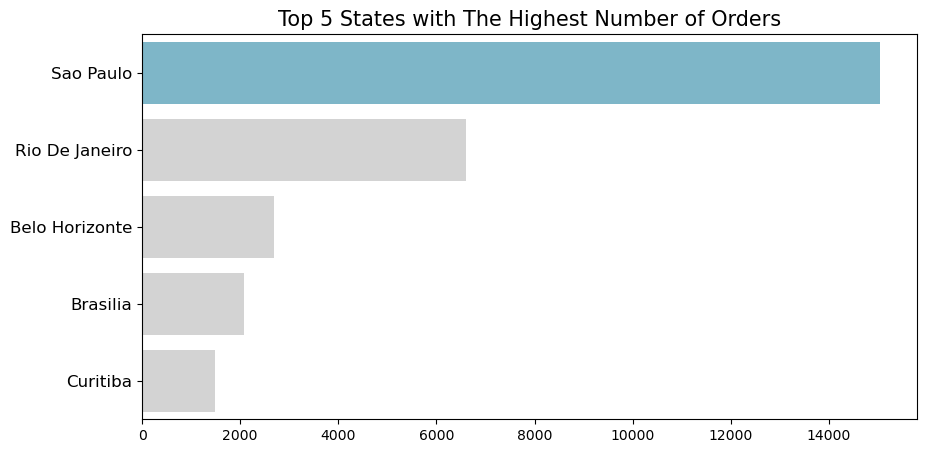

In [94]:
#creating data visualization
plt.figure(figsize=(10,5))

#data plotting
#sns.set_color_codes("pastel")

#creating the list of color
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = "total_order",
    y = "customer_city",
    data = top_five,
    palette = colors
)

plt.title("Top 5 States with The Highest Number of Orders", loc="center",fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show

### Question 2: What is the product category with the highest number of orders? 

In [95]:
all_df.head()

,order_id,product_quantity,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_category_name_english,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.9,13.3,58.9,Cool Stuff,Cool Stuff,...,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,7.0,871766c5855e863f6eccc05f988b23cb,Campos Dos Goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.9,19.9,239.9,Pet Shop,Pet Shop,...,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,16.0,eb28e67c4c0b83846050ddfb8a35d051,Santa Fe Do Sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.0,17.9,199.0,Moveis Decoracao,Furniture Decor,...,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,7.0,3818d81c6709e39d06b2738a8d3a2474,Para De Minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,13.0,12.8,13.0,Perfumaria,Perfumery,...,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,6.0,af861d436cfc08b2c2ddefd0ba074622,Atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.9,18.1,199.9,Ferramentas Jardim,Garden Tools,...,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,25.0,64b576fb70d441e8f1b2d7d446e483c5,Varzea Paulista,SP


In [96]:
#grouping the data
ordered_product = all_df.groupby(by="product_category_name_english").order_id.nunique().reset_index()

ordered_product.rename({"order_id":"total_order"},axis=1, inplace=True)
ordered_product.rename({"product_category_name_english":"product_category"},axis=1, inplace=True)

ordered_product.head()

,product_category,total_order
0,Agro Industry And Commerce,182
1,Air Conditioning,253
2,Art,202
3,Arts And Craftmanship,23
4,Audio,350


In [97]:
#sorting the data to only pick the five largest
#pick the top 5 
temp_sorted = ordered_product.sort_values(by="total_order",ascending=False)

#assigning the data
top_five = temp_sorted.head(5)
top_five.head()

,product_category,total_order
7,Bed Bath Table,9417
43,Health Beauty,8836
65,Sports Leisure,7720
15,Computers Accessories,6689
39,Furniture Decor,6449


C:\Users\asus\AppData\Local\Temp\ipykernel_30636\2785908508.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<function matplotlib.pyplot.show(close=None, block=None)>

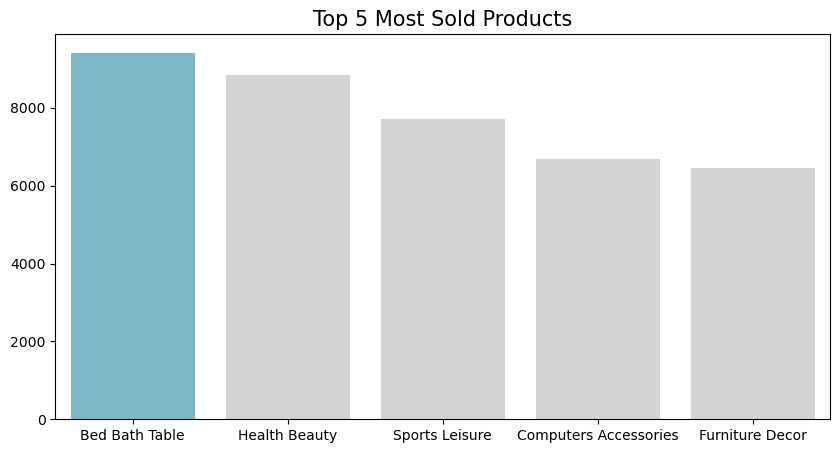

In [98]:
#creating data visualization
plt.figure(figsize=(10,5))

#data plotting
#sns.set_color_codes("pastel")

#creating the list of color
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y = "total_order",
    x = "product_category",
    data = top_five,
    palette = colors
)

plt.title("Top 5 Most Sold Products", loc="center",fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.show

### Question 3: What was the month with the highest number of orders in 2017? Can we get the any insight from that data to use for this year (2018)?

In [99]:
all_df.head()

,order_id,product_quantity,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_category_name_english,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.9,13.3,58.9,Cool Stuff,Cool Stuff,...,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,7.0,871766c5855e863f6eccc05f988b23cb,Campos Dos Goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.9,19.9,239.9,Pet Shop,Pet Shop,...,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,16.0,eb28e67c4c0b83846050ddfb8a35d051,Santa Fe Do Sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.0,17.9,199.0,Moveis Decoracao,Furniture Decor,...,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,7.0,3818d81c6709e39d06b2738a8d3a2474,Para De Minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,13.0,12.8,13.0,Perfumaria,Perfumery,...,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,6.0,af861d436cfc08b2c2ddefd0ba074622,Atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.9,18.1,199.9,Ferramentas Jardim,Garden Tools,...,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,25.0,64b576fb70d441e8f1b2d7d446e483c5,Varzea Paulista,SP


In [100]:
year_filter_2017 = all_df[(all_df['order_purchase_timestamp'] >= "2017-01-01") & (all_df['order_purchase_timestamp'] <= "2017-12-31")]

In [101]:
#selecting the data using groupby

#resample is use to specify rhe frequency which M stand for Month
monthly_orders_2017 = year_filter_2017.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id":"nunique",
    "total_price":"sum"
})

#formatting the month name
#strftime is use to convert the obejct to a string representing the datetime
#index holds the labels or identifiers for the row, in this case autoamtically refers to the datetime value
monthly_orders_2017.index = monthly_orders_2017.index.strftime('%B')
monthly_orders_2017       = monthly_orders_2017.reset_index()  

#rename the column
monthly_orders_2017.rename({"order_purchase_timestamp":"month","order_id":"total_order","total_price":"total_revenue"}, 
                           axis=1, inplace = True)

monthly_orders_2017.tail()

,month,total_order,total_revenue
7,August,4193,634340.3
8,September,4150,736801.0
9,October,4478,748513.9
10,November,7289,1149961.2
11,December,5442,787470.8


In [102]:
#filtering for 2018
year_filter_2018 = all_df[(all_df['order_purchase_timestamp'] >= "2018-01-01") & (all_df['order_purchase_timestamp'] <= "2018-09-30")]

In [103]:
#selecting the data using groupby

#resample is use to specify rhe frequency which M stand for Month
monthly_orders_2018 = year_filter_2018.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id":"nunique",
    "total_price":"sum"
})

#formatting the month name
#strftime is use to convert the obejct to a string representing the datetime
#index holds the labels or identifiers for the row, in this case autoamtically refers to the datetime value
monthly_orders_2018.index = monthly_orders_2018.index.strftime('%B')
monthly_orders_2018       = monthly_orders_2018.reset_index()  

#rename the column
monthly_orders_2018.rename({"order_purchase_timestamp":"month","order_id":"total_order","total_price":"total_revenue"}, 
                           axis=1, inplace = True)

monthly_orders_2018.tail()

,month,total_order,total_revenue
3,April,6798,1106278.6
4,May,6749,1116077.2
5,June,6099,965699.7
6,July,6159,978249.7
7,August,6351,932352.2


C:\Users\asus\AppData\Local\Temp\ipykernel_30636\2377781555.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(monthly_orders_2017['month'], rotation=45)
C:\Users\asus\AppData\Local\Temp\ipykernel_30636\2377781555.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(monthly_orders_2017['month'], rotation=45)


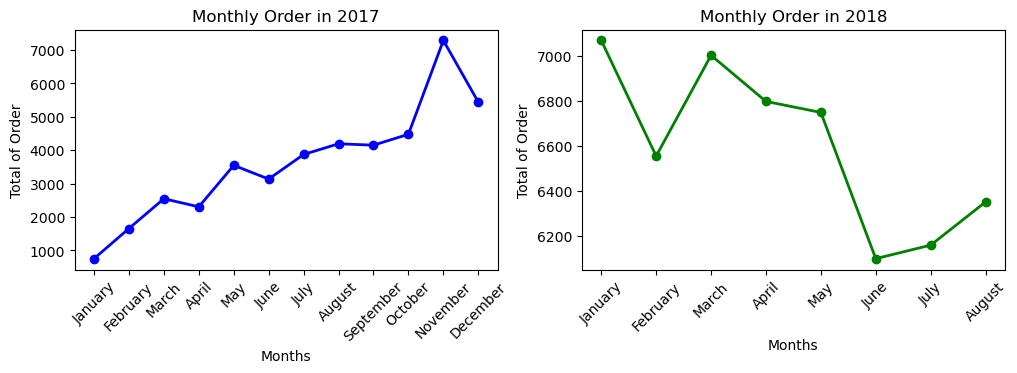

In [104]:
#create a figure and two subplots
#1 row 2 columns
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))


#plotting the line chart
ax1.plot(monthly_orders_2017['month'], monthly_orders_2017['total_order'], marker='o',linestyle='-',linewidth=2, color='blue',label='2017')
ax1.set_title("Monthly Order in 2017")
ax1.set_xlabel("Months")
ax1.set_xticklabels(monthly_orders_2017['month'], rotation=45)
ax1.set_ylabel("Total of Order")

ax2.plot(monthly_orders_2018['month'], monthly_orders_2018['total_order'], marker='o',linestyle='-',linewidth=2, color='green',label='2018')
ax2.set_title("Monthly Order in 2018")
ax2.set_xlabel("Months")
ax2.set_xticklabels(monthly_orders_2017['month'], rotation=45)
ax2.set_ylabel("Total of Order")

#adjusting the layout
plt.subplots_adjust(bottom=0.4)  # Adjust the bottom margin to 0.4

plt.show()

### RFM Analysis

In [105]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   product_quantity               112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   total_price                    112650 non-null  float64       
 8   product_category_name          112650 non-null  object        
 9   product_category_name_english  111023 non-null  object        
 10  product_name_lenght            112650 non-null  float64       
 11  

In [106]:
#find the recent puchase from the order data
recent_date = order_data_df["order_purchase_timestamp"].dt.date.max()

#conver to time series
recent_date = pd.Timestamp(recent_date)

In [107]:
rfm_df = all_df.groupby(by="customer_id").agg({
    #to find the recency
    "order_purchase_timestamp":lambda x: (recent_date - x.max()).days,
    
    #find the frequency
    "order_id": lambda x: len(x),
    
    #find the monetary
    "total_price": lambda x: x.sum()
})

rfm_df.rename({'order_purchase_timestamp':'recency','order_id':'frequency','total_price':'monetary'},axis=1,inplace=True)

#### RFM Score
To get the RFM Score, we scroed based on the quantiles of recency, monetary, and rececy dimension

#### Determining the RFM Quantiles
Dividing the quantiles to four
- x<= 0.25
- 0.25<x<=0.50
- 0.50<x<=0.70
- 0.70<x

In [108]:
#calculating the quantiles for each numeric column
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])

In [109]:
quantiles

,recency,frequency,monetary
0.25,115.0,1.0,47.5
0.50,220.0,1.0,89.9
0.75,348.0,1.0,159.9


In [110]:
#using dictionary for further use
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 115.0, 0.5: 220.0, 0.75: 348.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 47.5, 0.5: 89.9, 0.75: 159.9}}

#### Creating the RFM Segmentation Table

In [111]:
rfm_segmentation = rfm_df

In [112]:
#dimension refers to the r,f,m
def rfm_class(value,key,quantiles):
    if value <= quantiles[key][0.25]:
        return 4
    elif value <= quantiles[key][0.50]:
        return 3
    elif value <= quantiles[key][0.75]:
        return 2
    else:
        return 1

In [113]:
#applying the fucntion to each value in the recency column
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(rfm_class, args=('recency', quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(rfm_class,args=('frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary'].apply(rfm_class,args=('monetary',quantiles,))

In [114]:
rfm_segmentation.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
customer_id,,,,,,
00012a2ce6f8dcda20d059ce98491703,287,1,89.8,2,4,3
000161a058600d5901f007fab4c27140,408,1,54.9,1,4,3
0001fd6190edaaf884bcaf3d49edf079,546,1,180.0,1,4,1
0002414f95344307404f0ace7a26f1d5,377,1,149.9,1,4,2
000379cdec625522490c315e70c7a9fb,148,1,93.0,3,4,2


The RFM Score is produced by connecting all the quartile result

In [115]:
rfm_segmentation['RFMClass'] = rfm_segmentation['R_Quartile'].map(str)+\
rfm_segmentation['F_Quartile'].map(str)+\
rfm_segmentation['M_Quartile'].map(str)

In [116]:
rfm_segmentation.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,287,1,89.8,2,4,3,243
000161a058600d5901f007fab4c27140,408,1,54.9,1,4,3,143
0001fd6190edaaf884bcaf3d49edf079,546,1,180.0,1,4,1,141
0002414f95344307404f0ace7a26f1d5,377,1,149.9,1,4,2,142
000379cdec625522490c315e70c7a9fb,148,1,93.0,3,4,2,342


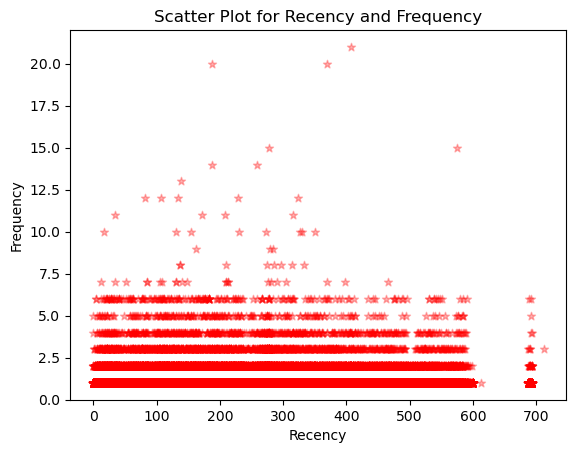

In [117]:
plt.scatter(rfm_df['recency'],rfm_df['frequency'],
            color = 'red',
            marker = '*', alpha = 0.3
           )
plt.title('Scatter Plot for Recency and Frequency') 
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

The customer buys frequently when their recency is less.

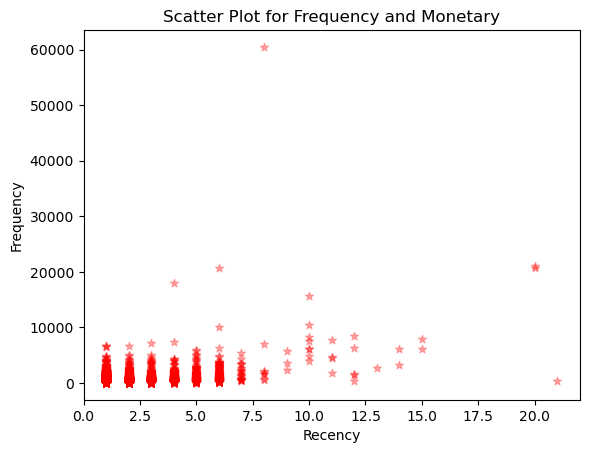

In [118]:
plt.scatter(rfm_df['frequency'],rfm_df['monetary'],
            color = 'red',
            marker = '*', alpha = 0.3
           )
plt.title('Scatter Plot for Frequency and Monetary') 
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

The customer who buy frequently are spending the less amount, the reason might a lot, one of those is everytime they palced an order, it is only for a cheap price product

In [119]:
rfm_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 00012a2ce6f8dcda20d059ce98491703 to ffffa3172527f765de70084a7e53aae8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recency     96478 non-null  int64  
 1   frequency   96478 non-null  int64  
 2   monetary    96478 non-null  float64
 3   R_Quartile  96478 non-null  int64  
 4   F_Quartile  96478 non-null  int64  
 5   M_Quartile  96478 non-null  int64  
 6   RFMClass    96478 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 7.9+ MB


#### Segmenting Customer Based on The RFM Scores

In [120]:
segment = []

for row in rfm_segmentation['RFMClass']:
    #converting to string
    row = str(row)
    if int(row[0]) ==4 and int(row[1]) == 4 and int(row[2]) == 4:
        segment.append('Best Customer')
    elif int(row[0])==1 and int(row[2])==1:
        segment.append('Lost Cheap Customer')
    elif int(row[0])==1 and int(row[2])==4:
        segment.append('Lost Big Spend Customer')
    elif int(row[0])==2 and int(row[2])==4:
        segment.append('Almost Lost Big Spender')
    elif int(row[0])==2:
        segment.append('Almost Lost')
    elif int(row[1])==4:
        segment.append('Loyal')
    elif int(row[2])==4:
        segment.append('Big Spender')
    else:
        segment.append('Failed')

In [121]:
rfm_segmentation['segment'] = segment
rfm_segmentation.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,segment
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,287,1,89.8,2,4,3,243,Almost Lost
000161a058600d5901f007fab4c27140,408,1,54.9,1,4,3,143,Loyal
0001fd6190edaaf884bcaf3d49edf079,546,1,180.0,1,4,1,141,Lost Cheap Customer
0002414f95344307404f0ace7a26f1d5,377,1,149.9,1,4,2,142,Loyal
000379cdec625522490c315e70c7a9fb,148,1,93.0,3,4,2,342,Loyal


In [122]:
rfm_segmentation.reset_index(inplace=True)

In [123]:
#grouping the data
customer_segmentation= rfm_segmentation.groupby(by="segment").customer_id.nunique().reset_index()

customer_segmentation.rename({"customer_id":"total_customer"},axis=1, inplace=True)

customer_segmentation.head()

,segment,total_customer
0,Almost Lost,18208
1,Almost Lost Big Spender,5799
2,Best Customer,6008
3,Big Spender,179
4,Failed,5480


In [124]:
temp_sorted = customer_segmentation.sort_values(by="total_customer",ascending=False)

#assigning the data
customer_segmentation = temp_sorted

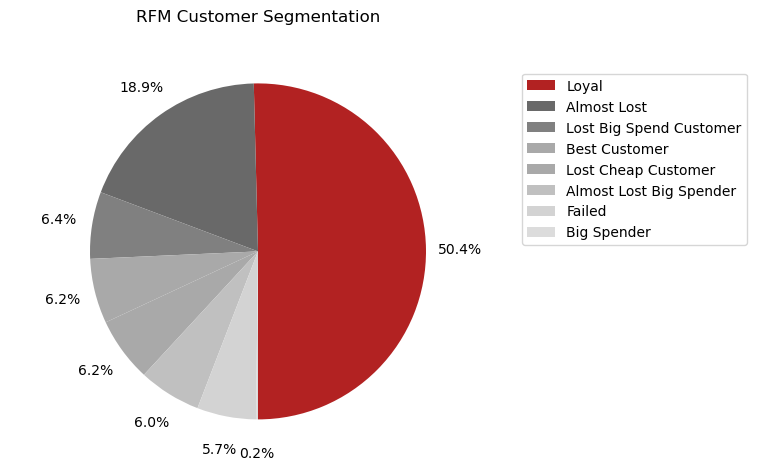

In [125]:
colors = ["firebrick","dimgrey","grey","darkgray","darkgrey","silver","lightgrey","gainsboro"]
plt.pie(customer_segmentation['total_customer'],colors = colors, startangle=270,autopct='%1.1f%%',pctdistance = 1.2)

#adding the legend
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1),labels=customer_segmentation['segment'])

plt.title("RFM Customer Segmentation", y=1.10)
#encusre that pie is drawn as a circle
plt.axis('equal')
plt.show()

In [126]:
all_df.to_csv("all_data.csv", index=False)

In [127]:
rfm_segmentation.to_csv("rfm_data.csv", index=False)

## Conclusion

#### Conclusion 1

Based on the visualization, state with **highest** concentration of customers placing orders is **Sau Pauolo**. Here are the top fives:

1. Sao Pauolo
2. Rio De Janeiro
3. Belo Horioznte
4. Brasilia
5. Cusitiba

#### Conclusion 2

Based on the visualization, the most sold product category is **Bed Bath Table**, with the other top sold product are in this list below:

1. Bed Bath Table
2. Health Beauty
3. Sports Leisure
4. Computer Accessories
5. Furniture Decor

#### Conclusion 3

Based on the visualization,the month with the highest number of orders in 2017 is **November**. On the other hand, between 2017 and 2018 there is a significant pattern of the order placement. But, the majority of month in 2018 doing pretty well compare to 2017. A lot of factors might be affecting, starting the change of customer behaviour or even competitors.

Based on the 2017 pattern, we might expect a good result from September-December. 

#### Conclusion 4

Based on the customer segmentation using the RFM analysis, **loyal customers** are in the first position. It indicates that they visit the website for many time which could tell us we have a good engagement to the customers. But, on the other hand, the almost lost customers are in the second position. Almost lost customers mean thos who have not visit the website for somtetime. At this point, the company could start to do the an improvement on engaging the customers.